# Домашнее задание 2

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [2]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [3]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('hw2.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [4]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [5]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


     Здесь мы можем принять как интересные корреляции, превышающие 0, 7: 



   MonthlyIncome and JobLevel = 0.950300

   TotalWorkingYears and JobLevel = 0.782208

   JobLevel and TotalWorkingYears = 0.782208

   MonthlyIncome and TotalWorkingYears = 0.772893

   YearsInCurrentRole and YearsAtCompany = 0.758754

   YearsWithCurrManager and YearsAtCompany = 0.769212

   YearsAtCompany and YearsInCurrentRole = 0.758754

   YearsWithCurrManager and YearsInCurrentRole = 0.714365

   YearsAtCompany and  YearsWithCurrManager = 0.769212

   YearsInCurrentRole and YearsWithCurrManager = 0.714365



     Это означает, что оба связаны положительно, и если один поднимается, другой тоже

In [10]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['Education'].nunique()

5

In [11]:
# Eсть пять уровней образования

In [12]:
# Теперь глянем, что это за гендеры?
df_hr['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [ ]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

In [13]:
df_hr['Education'].count()

1470

In [14]:
df_hr['Education'].sum()

4282

In [ ]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [15]:
df_hr['HourlyRate'].sum()

96860

In [16]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [17]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* float64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [18]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='YearsAtCompany'>

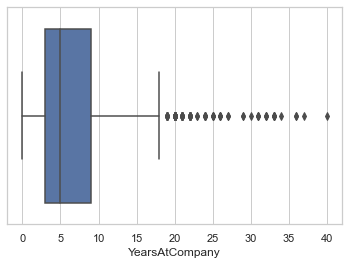

In [112]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["YearsAtCompany"])

Медиана = 5 лет

50% сотрудников входят в диапазон стажа в нашей компании от 3 до 9 лет.

А между усами смотрим что там входит 99% значения, это означает, что количество сотрудников, проработавших больше примерно 17 лет, сокращается.

Text(0, 0.5, 'Amount of employees')

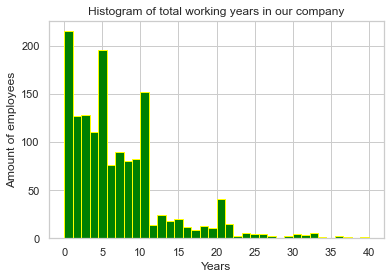

In [113]:
# matplotlib histogram
plt.hist(df_hr['YearsAtCompany'], color = 'green', edgecolor = 'yellow',
         bins = int(180/5))

# Add labels
plt.title('Histogram of total working years in our company')
plt.xlabel('Years')
plt.ylabel('Amount of employees')

Text(0, 0.5, 'Amount of employees')

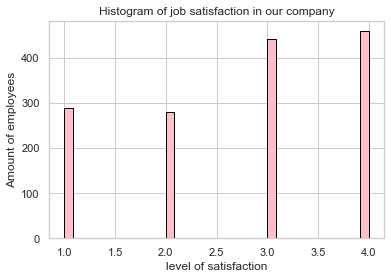

In [114]:
# matplotlib histogram
plt.hist(df_hr['JobSatisfaction'], color = 'pink', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of job satisfaction in our company')
plt.xlabel('level of satisfaction')
plt.ylabel('Amount of employees')

In [115]:
import numpy as np

In [116]:
# Среднее значение по удовлетворенность на работе
np.mean(df_hr.JobSatisfaction)

2.7285714285714286

In [117]:
# А медиана? 
np.median(df_hr.JobSatisfaction)

3.0

Мы видим асимметричное распределение, так как медиана выше моды, что означает, что тенденция данных больше к правой стороне, что означает, что есть много работников удовлетворены на своих рабочих местах

In [118]:
# Variance (дисперсия) удовлетворенности на работе
np.var(df_hr.JobSatisfaction)

1.2154421768707357

In [119]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.JobSatisfaction)

1.102470941508544

In [120]:
3*np.std(df_hr.JobSatisfaction)

3.307412824525632

# Сделаем подвыборку из выборки

In [70]:
# Выделим в отдельные массивы сотрудников с разными GenderID
df_hr_g1 = df_hr[df_hr['Education'] == 1]
df_hr_g0 = df_hr[df_hr['Education'] == 5]

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [73]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
52,44,No,Travel_Rarely,1488,Sales,1,5,Marketing,1,68,...,3,80,1,9,2,2,4,3,1,3
56,35,No,Travel_Frequently,853,Sales,18,5,Life Sciences,1,74,...,4,80,1,9,3,2,9,8,1,8
61,38,No,Travel_Frequently,653,Research & Development,29,5,Life Sciences,1,79,...,4,80,0,10,2,3,10,3,9,9
142,38,No,Travel_Rarely,364,Research & Development,3,5,Technical Degree,1,193,...,2,80,0,19,2,3,3,2,2,2
151,35,No,Travel_Rarely,662,Sales,1,5,Marketing,1,204,...,1,80,2,10,3,3,10,8,0,6


In [75]:
print("Count of Education = 1\
 is {} and for Education = 5 is {}".format(len(df_hr_g1),
                                           len(df_hr_g0)))

Count of Education = 1 is 170 and for Education = 5 is 48


In [76]:
print("Median of JobSatsifaction for Education = 1 \
is {} and for Education = 0 is {}".format(np.median(df_hr_g1.JobSatisfaction),
                                           np.median(df_hr_g0.JobSatisfaction)))

Median of JobSatsifaction for Education = 1 is 3.0 and for Education = 0 is 3.0


Анализируя образование сотрудников, мы видим, что те, кто имеет более низкий уровень образования (1), почти полностью удовлетворены своей работой (3 из 4), так же, как сотрудники, которые имеют самый высокий уровень образования в компании (5), также с оценкой 3

<AxesSubplot:xlabel='JobSatisfaction'>

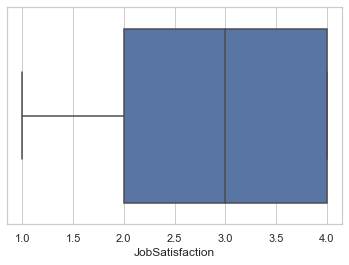

In [81]:
sns.boxplot(x=df_hr_g1["JobSatisfaction"])

<AxesSubplot:xlabel='JobSatisfaction'>

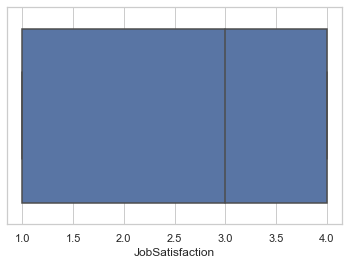

In [82]:
sns.boxplot(x=df_hr_g0["JobSatisfaction"])

Мы видим, что сотрудники с более низким уровнем образования более удовлетворены работой, чем те, кто имеет высокий уровень образования.

Text(0, 0.5, 'Amount of employees')

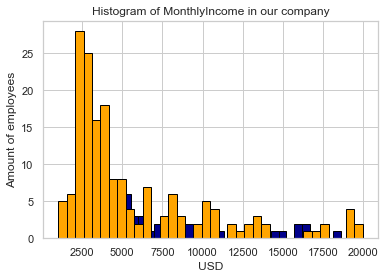

In [98]:
plt.hist(df_hr_g0['MonthlyIncome'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of MonthlyIncome in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

Сравнивая уровень образования сотрудников с ежемесячным доходом, который они получают, видим странное поведение в компании. Те работники с образованием 1 имеют широкий разрыв в доходах, которые варьируются от самой низкой до самой высокой заработной платы, в то время, работники с образованием 5 не достигают самой высокой заработной платы, хотя большинство из них уходят от базовой оплаты.

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [121]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['YearsAtCompany'] > 
                            np.mean(df_hr.YearsAtCompany) + 3*np.std(df_hr.YearsAtCompany),                 
                            1, 0)

In [122]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,...,80,1,29,2,2,27,3,13,8,1
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,80,0,38,1,2,37,10,1,8,1
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,...,80,1,40,3,2,40,10,15,6,1
190,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,...,80,1,34,5,3,33,18,11,9,1
237,52,No,Non-Travel,771,Sales,2,4,Life Sciences,1,329,...,80,0,33,2,4,33,7,15,12,1
270,55,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,...,80,0,37,2,3,36,10,4,13,1
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,...,80,0,33,5,1,29,8,11,10,1
425,50,No,Travel_Rarely,1099,Research & Development,29,4,Life Sciences,1,569,...,80,1,28,2,3,27,10,15,7,1
473,49,No,Travel_Rarely,1245,Research & Development,18,4,Life Sciences,1,638,...,80,1,31,5,3,31,9,0,9,1
477,50,No,Travel_Frequently,1246,Human Resources,3,3,Medical,1,644,...,80,1,32,2,3,32,5,10,7,1


У нас есть 25 человек, которые работают в нашей компании более 26 лет. Проводя быстрый анализ, мы видим, что они являются сотрудниками более 46 лет с опытом работы более 26 лет.

## Оценка абсентеизма - количества отсутствий на рабочем месте

(array([ 28.,  29.,  40.,  65.,  96., 128., 130., 135., 147., 108., 139.,
         78.,  74.,  57.,  43.,  49.,  37.,  40.,  18.,  29.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <BarContainer object of 20 artists>)

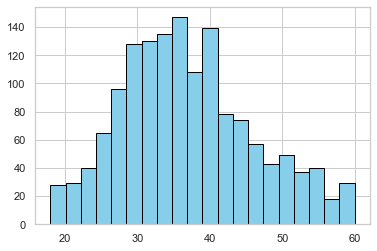

In [131]:
plt.hist(df_hr['Age'], color = 'skyblue', edgecolor = 'black', bins = 20)

Большинство сотрудников находятся в возрасте от 30 до 40 лет

In [128]:
df_hr.Age.quantile(q=0.1)

26.0

Это означает, что 10% сотрудников в выборке находятся в возрасте менее 26 года. 

In [130]:
df_hr_ab = df_hr[df_hr['Age'] < 26]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,80,2,1,2,2,1,0,0,0,0
20,24,No,Non-Travel,673,Research & Development,11,2,Other,1,26,...,80,1,5,5,2,4,2,1,3,0
23,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,80,0,0,6,3,0,0,0,0,0
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,80,1,6,2,2,2,0,2,0,0
86,23,No,Travel_Rarely,541,Sales,2,1,Technical Degree,1,113,...,80,1,3,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,25,No,Travel_Rarely,977,Research & Development,2,1,Other,1,1992,...,80,1,7,2,2,2,2,0,2,0
1423,22,No,Travel_Rarely,581,Research & Development,1,2,Life Sciences,1,2007,...,80,0,4,2,4,3,2,1,2,0
1433,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,2018,...,80,1,6,3,2,5,3,0,4,0
1436,21,No,Travel_Rarely,501,Sales,5,1,Medical,1,2021,...,80,0,2,6,3,2,2,1,2,0


Получили 123 человек, которые находятся в возрасте менее 26 года

# Выводы по набору данных

Анализ был основан на следующих данных:  
1. Набор содержит информацию о 1470 сотрудниках. 
2. Был оценен их уровень удовлетворенности и проведен анализ сотрудников с более высоким и более низким уровнем образования, что показало, что некоторые люди с более высоким образованием не удовлетворены работой по сравнению с людьми с низким уровнем образования. 
3. Была проведена связь между ежемесячным доходом и образованием, и было показано, что люди с высоким образованием не являются теми, кто находится на высоких должностях. 
4. Был проведен анализ возраста работников, обнаружив, что это компания, которая имеет пожилых сотрудников, но с большим опытом.
